# Linear regression model to predict the salary based on the employees year of work exprience

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
%matplotlib inline
warnings.filterwarnings(action="ignore", category=FutureWarning)

### Loading the dataset

In [2]:
df = pd.read_csv("Salary_Data.csv")

In [3]:
df.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [4]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


### Checking null values

In [6]:
df.isnull().sum(axis=0)

YearsExperience    0
Salary             0
dtype: int64

### Tain and test split

In [7]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

### Splitting the data set into training and testing set

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=1 / 3, random_state=42
)

In [9]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Getting the predictions from the train model

In [10]:
y_pred = regressor.predict(X_test)

In [11]:
r2 = r2_score(y_test, y_pred)
r2

0.9553063138044949

## Visualise the test set results 

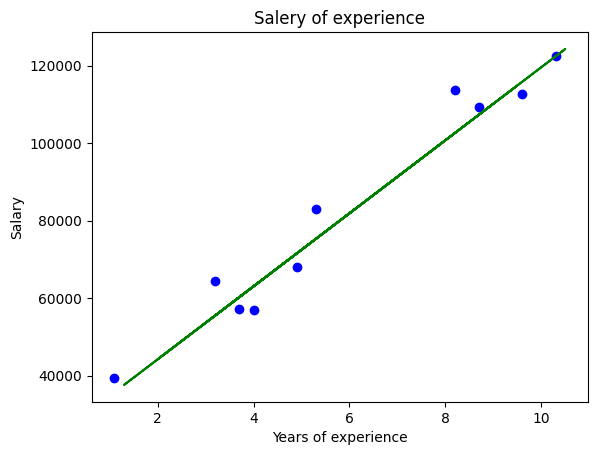

In [12]:
plt.scatter(X_test, y_test, color="b")
plt.plot(X_train, regressor.predict(X_train), color="g")
plt.title("Salery of experience")
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()

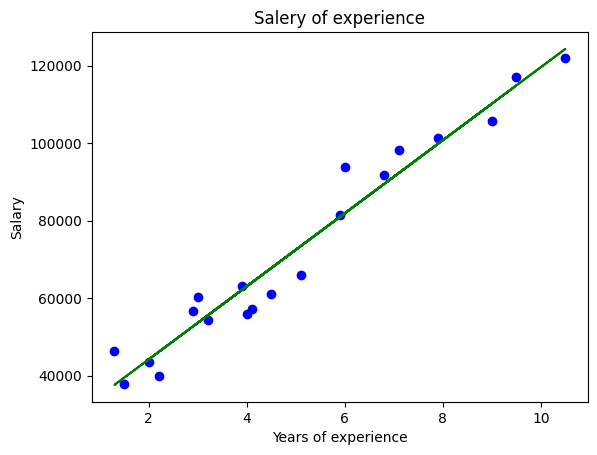

In [13]:
plt.scatter(X_train, y_train, color="b")
plt.plot(X_train, regressor.predict(X_train), color="g")
plt.title("Salery of experience")
plt.xlabel("Years of experience")
plt.ylabel("Salary")
plt.show()

In [14]:
y_test

array([112635.,  67938., 113812.,  83088.,  64445.,  57189., 122391.,
       109431.,  56957.,  39343.])

In [15]:
print(regressor.intercept_)
print(regressor.coef_)

25324.33537924433
[9426.03876907]


In [16]:
print('Mean absolute error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root mean squared error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean absolute error: 4956.5232614449005
Mean Squared Error: 35301898.887134895
Root mean squared error: 5941.540110706558
